In [323]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
os.getcwd()

'/Users/Chenyang/Desktop/NOTEBOOK'

In [324]:
train_data_file_path = os.getcwd() + '/datasets/kaggle_housing_data/train.csv'

In [325]:
housing = pd.read_csv(train_data_file_path)

In [326]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [327]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [328]:
cols_with_few_data = []
for name in list(housing):
    total_rows = housing.shape[0]
    num_nulls = housing[name].isnull().sum()
    num_not_nulls = total_rows - num_nulls
    if num_not_nulls < 1000:
        cols_with_few_data.append(name)

In [329]:
cols_with_few_data

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [330]:
housing.drop(cols_with_few_data, axis = 1, inplace = True)

In [331]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [332]:
num_attributes = housing.select_dtypes(exclude = ['object'])
cat_attributes = housing.select_dtypes(include = ['object'])

In [333]:
num_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [334]:
num_attributes.fillna(num_attributes.mean(), inplace = True)

In [335]:
num_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [336]:
cat_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [337]:
cat_attributes.fillna(cat_attributes.mode().iloc[0], inplace = True)

In [338]:
cat_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [339]:
num_attributes.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [340]:
low_corr_cols = []
for name in num_attributes.columns:
    if abs(num_attributes[name].corr(num_attributes['SalePrice'])) < 0.15:
        low_corr_cols.append(name)
low_corr_cols

['Id',
 'MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [341]:
num_attributes.drop(low_corr_cols, axis = 1, inplace = True)

In [342]:
num_attributes

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,3,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,3,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,3,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,3,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,4,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,1,3,7,1,1999.0,2,460,0,40,175000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,0,3,7,2,1978.0,2,500,349,0,210000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,0,4,9,2,1941.0,1,252,0,60,266500
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,0,2,5,0,1950.0,1,240,366,0,142125


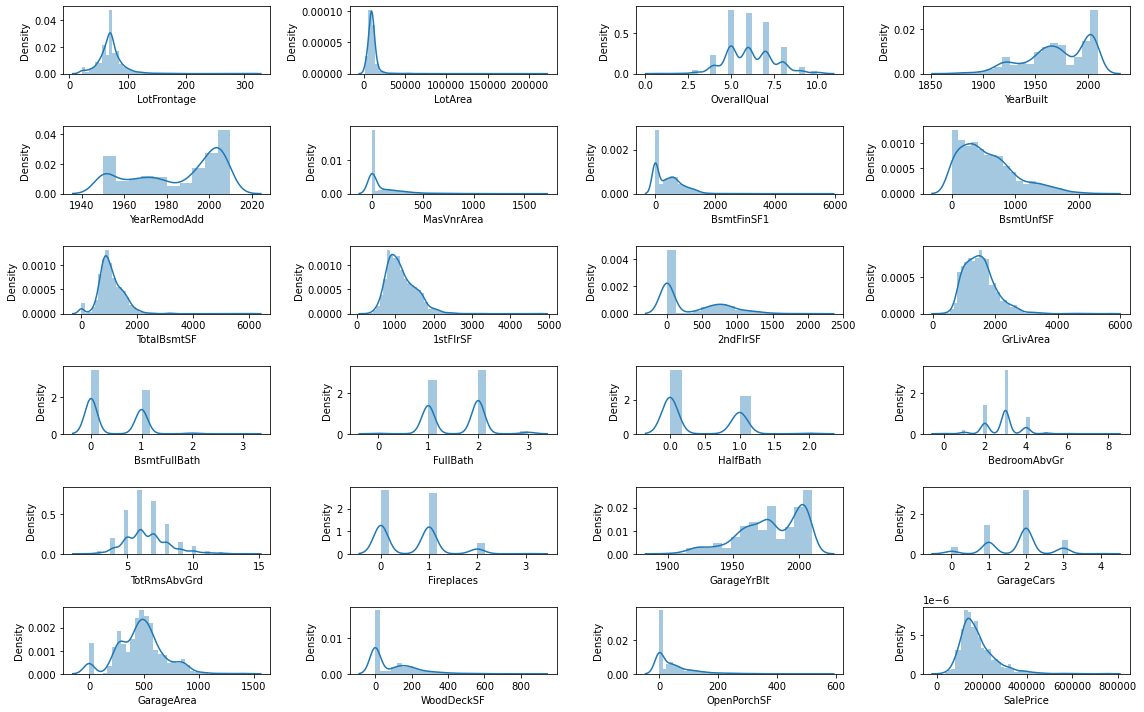

In [343]:
plt.figure(figsize = (16, 10))
num_cols = len(list(num_attributes))
for i in range(num_cols):
    plt.subplot(6,4,i+1)
    sns.distplot(num_attributes.iloc[:, i])
plt.tight_layout()

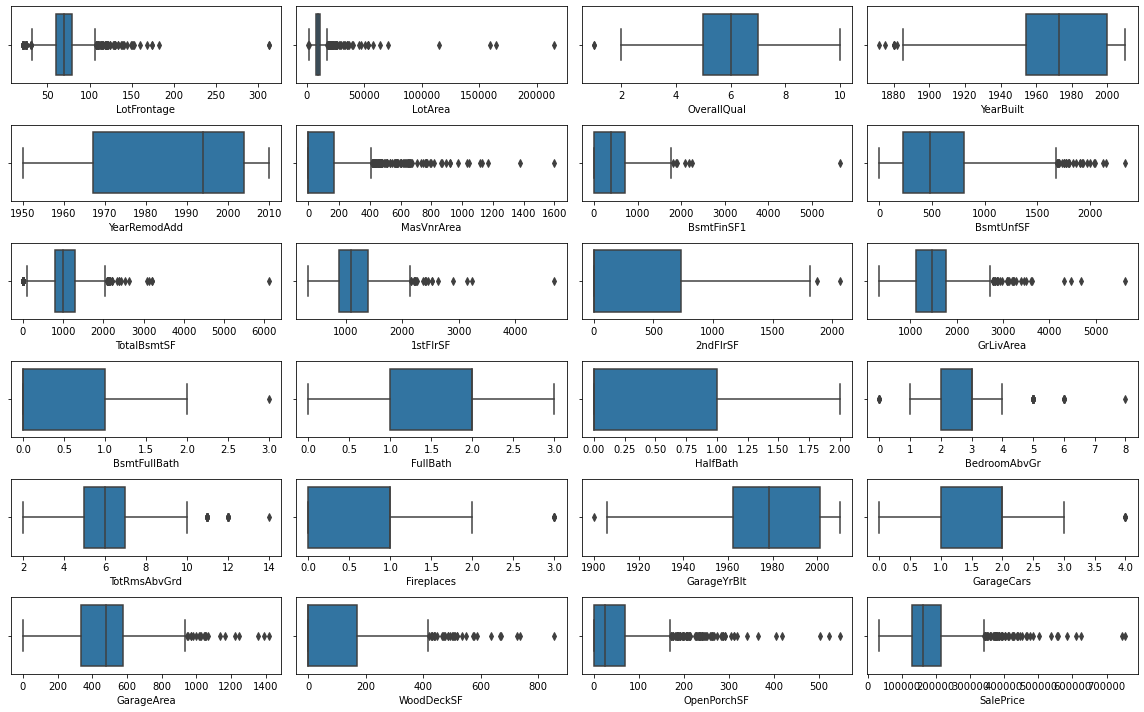

In [344]:
plt.figure(figsize = (16, 10))
num_cols = len(list(num_attributes))
for i in range(num_cols):
    plt.subplot(6,4,i+1)
    sns.boxplot(num_attributes.iloc[:, i])
plt.tight_layout()

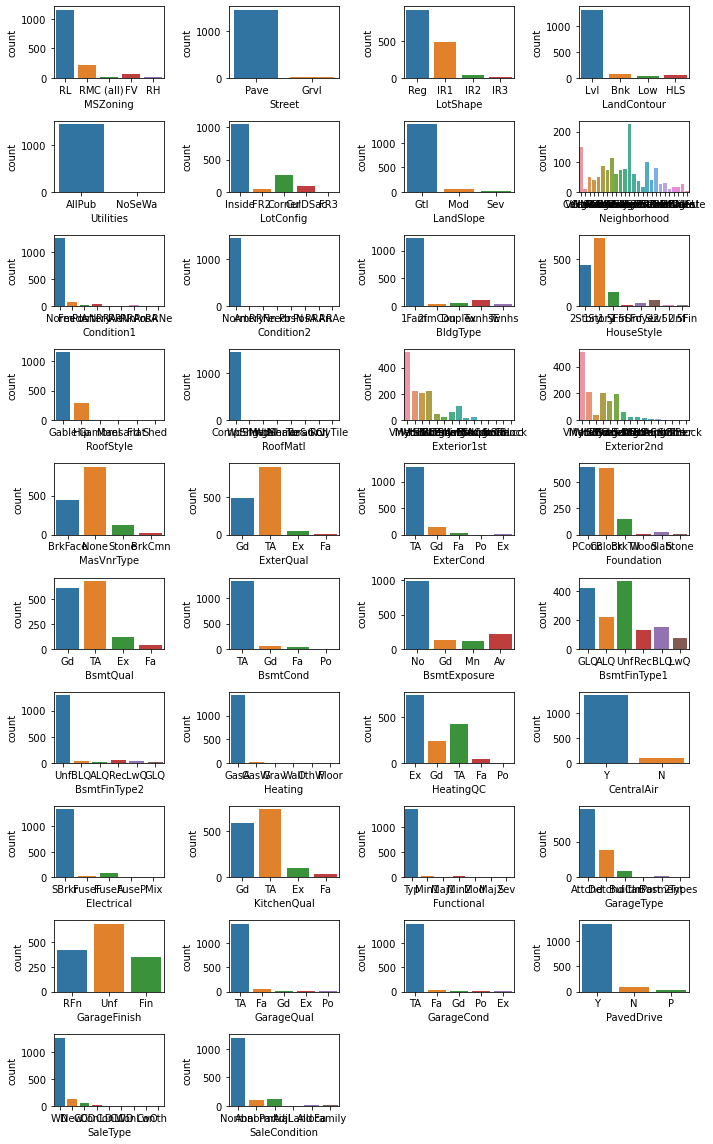

In [345]:
plt.figure(figsize = (10, 16))
num_cols = len(list(cat_attributes))
for i in range(num_cols):
    plt.subplot(10,4,i+1)
    sns.countplot(cat_attributes.iloc[:, i])
plt.tight_layout()

In [346]:
num_attributes.shape

(1460, 24)

In [347]:
cat_attributes.shape

(1460, 38)

In [348]:
# remove outliers rows
col_names = list(num_attributes)
col_names.remove('SalePrice')
for name in col_names:
    bool_mat = num_attributes[name] > num_attributes[name].quantile(0.999)
    index = num_attributes[name][bool_mat].index
    num_attributes.drop(index, inplace = True)
    cat_attributes.drop(index, inplace = True)
num_attributes.shape

(1431, 24)

In [303]:
cat_attributes.shape

(1431, 38)

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_columns = num_attributes.drop(['SalePrice'], axis = 1)
X = X_columns.assign(const = 1)
vif_report = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)
vif_report

LotFrontage         1.313425
LotArea             1.248037
OverallQual         2.920862
YearBuilt           4.084202
YearRemodAdd        1.970451
MasVnrArea          1.330815
BsmtFinSF1          7.971596
BsmtUnfSF           8.466689
TotalBsmtSF         9.510780
1stFlrSF           70.680158
2ndFlrSF          101.265420
GrLivArea         124.215938
BsmtFullBath        1.983536
FullBath            2.852717
HalfBath            2.192462
BedroomAbvGr        2.257632
TotRmsAbvGrd        4.414476
Fireplaces          1.519088
GarageYrBlt         3.310713
GarageCars          5.549054
GarageArea          5.322437
WoodDeckSF          1.163335
OpenPorchSF         1.207124
const           21890.679556
dtype: float64

In [305]:
num_attributes['new_feature'] = (num_attributes['GrLivArea'] + num_attributes['1stFlrSF'] + num_attributes['2ndFlrSF'])/3.

In [306]:
num_attributes.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF'], axis = 1)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,new_feature
0,65.0,8450,7,2003,2003,196.0,706,150,856,1,...,3,8,0,2003.0,2,548,0,61,208500,1140.000000
1,80.0,9600,6,1976,1976,0.0,978,284,1262,0,...,3,6,1,1976.0,2,460,298,0,181500,841.333333
2,68.0,11250,7,2001,2002,162.0,486,434,920,1,...,3,6,1,2001.0,2,608,0,42,223500,1190.666667
3,60.0,9550,7,1915,1970,0.0,216,540,756,1,...,3,7,1,1998.0,3,642,0,35,140000,1144.666667
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1,...,4,9,1,2000.0,3,836,192,84,250000,1465.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,7,2004,2005,0.0,410,811,1221,1,...,2,6,0,2004.0,2,400,0,113,185000,814.000000
1455,62.0,7917,6,1999,2000,0.0,0,953,953,0,...,3,7,1,1999.0,2,460,0,40,175000,1098.000000
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,1,...,3,7,2,1978.0,2,500,349,0,210000,1382.000000
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,0,...,4,9,2,1941.0,1,252,0,60,266500,1560.000000


In [307]:
y = num_attributes['SalePrice']
num_attributes = num_attributes.drop(['SalePrice'], axis = 1)
combined = pd.concat([num_attributes, cat_attributes], axis = 1)

In [308]:
combined.shape

(1431, 62)

In [309]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [310]:
num_pipe = Pipeline([('scale', StandardScaler())])
cat_pipe = Pipeline([('onehot', OneHotEncoder())])

In [311]:
ct = ColumnTransformer([('num', num_pipe, list(num_attributes)),
                        ('cat', cat_pipe, list(cat_attributes))])

In [312]:
X = ct.fit_transform(combined)

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [315]:
lrg = LinearRegression()
lrg.fit(X_train, y_train)
y_pred = lrg.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [316]:
r2

0.8955824474965978

In [317]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9005688398765235

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
param_grid = {'max_depth': [5, 10, 20],
              'n_estimators': [100, 200]}
cv = GridSearchCV(rf, param_grid = param_grid, scoring = 'r2')
cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20], 'n_estimators': [100, 200]},
             scoring='r2')

In [320]:
cv.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [321]:
new_rf = RandomForestRegressor(max_depth = 10 , n_estimators = 200)
new_rf.fit(X_train, y_train)
y_pred = new_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8987767264410339